#1 高斯朴素贝叶斯对于鸢尾花的分类

训练集准确度: 82.86%
测试集准确度：71.11%


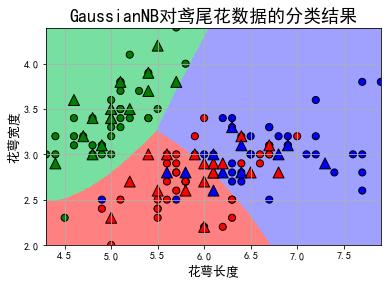

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.naive_bayes import GaussianNB,
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def iris_type(s):
    it = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return it[s]

data = pd.read_csv('data/iris.data', header=None)
x, y = data[np.arange(4)], data[4]
y = pd.Categorical(values=y).codes
feature_names = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
features = [0,1]
x = x[features]
x, x_test, y, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

priors = np.array((1,2,4), dtype=float)
priors /= priors.sum()
gnb = Pipeline([
    ('sc', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1)), # 扩展成向量
    ('clf', GaussianNB(priors=priors))])    # 由于鸢尾花数据是样本均衡的，其实不需要设置先验值
gnb.fit(x, y.ravel())
y_hat = gnb.predict(x)
print('训练集准确度: %.2f%%' % (100 * accuracy_score(y, y_hat)))
y_test_hat = gnb.predict(x_test)
print('测试集准确度：%.2f%%' % (100 * accuracy_score(y_test, y_test_hat)))  # 画图

N, M = 500, 500     # 横纵各采样多少个值
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)                    # 生成网格采样点
x_grid = np.stack((x1.flat, x2.flat), axis=1)   # 测试点

mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_grid_hat = gnb.predict(x_grid)                  # 预测值
y_grid_hat = y_grid_hat.reshape(x1.shape)
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_grid_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(x[features[0]], x[features[1]], c=y, edgecolors='k', s=50, cmap=cm_dark)
plt.scatter(x_test[features[0]], x_test[features[1]], c=y_test, marker='^', edgecolors='k', s=120, cmap=cm_dark)

plt.xlabel(feature_names[features[0]], fontsize=13)
plt.ylabel(feature_names[features[1]], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'GaussianNB对鸢尾花数据的分类结果', fontsize=18)
plt.grid(True)
plt.show()